In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
name = 'name'
geoCoord = 'geoCoord'
coordination_source  = coordination_source.split('\n')
coordination_source = [el for el in coordination_source if not el.startswith('//')]
coordination_source = '\n'.join(coordination_source)
city_info = eval('[' + coordination_source.strip() + ']')

In [3]:
city_info = {dic['name']: dic['geoCoord'] for dic in city_info}

In [4]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [5]:
def get_distance(city_from, city_to):
    return geo_distance(city_info[city_from], city_info[city_to])

In [6]:
get_distance('北京', '上海')

727.52769688981

In [7]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

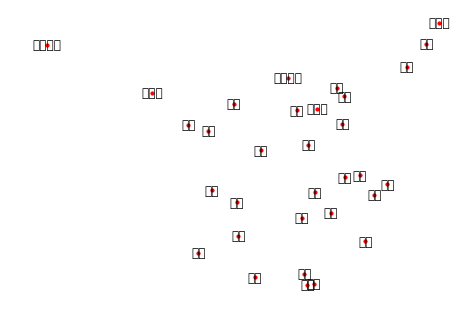

In [9]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [10]:
def get_threshold_city(city_info):
    threshold = 700
    cities = city_info.keys()
    return_dict = {}
    for c1 in cities:
        return_dict[c1] = [c for c in cities if c != c1 and get_distance(c, c1) < threshold]
    return return_dict

In [12]:
threshold_city = get_threshold_city(city_info)

In [16]:
graph = nx.Graph(threshold_city)
graph.add_nodes_from(city_info)

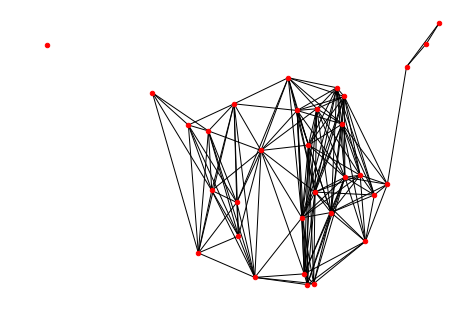

In [21]:
nx.draw(graph, city_info, with_labels=0, node_size=20)

In [41]:
def search(graph, start, distination, search_method):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        for city in threshold_city[path[-1]]:
            if city in path:
                continue
            pathes.append(path + [city])
        pathes = search_method(pathes)
        if pathes and pathes[0][-1] == distination:
            return pathes[0]

In [42]:
search(graph, '北京', '上海', lambda x: x)

['北京', '济南', '上海']

In [43]:
def calculate_distance(path):
    distance = 0
    for i in range(len(path) - 1):
        distance += get_distance(path[i], path[i + 1])
    return distance

In [44]:
def search_method_1(pathes):
    return sorted(pathes, key=lambda x: calculate_distance(x))

In [45]:
calculate_distance(['北京', '济南', '上海'])

752.66259009181

In [48]:
search(graph, '北京', '上海', search_method_1)

['北京', '天津', '上海']

In [47]:
calculate_distance(['北京', '天津', '上海'])

732.5085345714293

In [49]:
from sklearn.datasets import load_boston
import random

In [50]:
dataset = load_boston()

In [53]:
x, y = dataset['data'], dataset['target']

In [54]:
x.shape

(506, 13)

In [57]:
y.shape

(506,)

In [58]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

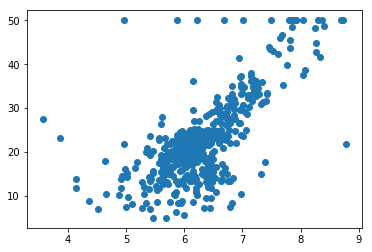

In [71]:
plt.scatter(x[:,5], y)